### 17-07-2020

### Objectives 
* Introduction to time series data
* Loading and handling Time series data in pandas 
* Checking pattern in time series data 
* Time series forecasting 

## Introduction to time series data 
* TS data points collected at constant time intervels 
* Data is time dependent column 
* Data has sesionality trends 

### loading time series data using pandas 
* 

In [1]:
import pandas as pd 

In [2]:
df = pd.read_excel('C:\\Users\\saket\\Downloads\\jupyter notebook\\edyoda data\\Sample - Superstore.xls')

In [3]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [5]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [6]:
#help(pd.read_csv)


In [7]:
df.sample(10)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
1589,1590,CA-2016-109911,2016-05-12,2016-05-16,Standard Class,VG-21805,Vivek Grady,Corporate,United States,Virginia Beach,...,23464,South,OFF-AR-10001662,Office Supplies,Art,Rogers Handheld Barrel Pencil Sharpener,10.960,4,0.0,2.9592
9398,9399,CA-2014-125997,2014-09-20,2014-09-23,First Class,MW-18220,Mitch Webber,Consumer,United States,New York City,...,10011,East,TEC-PH-10003072,Technology,Phones,Panasonic KX-TG9541B DECT 6.0 Digital 2-Line E...,1349.910,9,0.0,661.4559
7820,7821,CA-2017-152436,2017-12-08,2017-12-10,Second Class,CW-11905,Carl Weiss,Home Office,United States,Cranston,...,2920,East,OFF-ST-10000036,Office Supplies,Storage,Recycled Data-Pak for Archival Bound Computer ...,592.740,6,0.0,160.0398
2223,2224,CA-2015-131884,2015-12-06,2015-12-06,Same Day,DK-13375,Dennis Kane,Consumer,United States,Marion,...,43302,East,FUR-CH-10004860,Furniture,Chairs,Global Low Back Tilter Chair,70.686,1,0.3,-24.2352
5073,5074,CA-2015-145485,2015-11-05,2015-11-05,Same Day,JM-16195,Justin MacKendrick,Consumer,United States,San Francisco,...,94109,West,OFF-ST-10000649,Office Supplies,Storage,Hanging Personal Folder File,62.800,4,0.0,15.7000
3837,3838,CA-2014-126760,2014-07-26,2014-08-02,Standard Class,KM-16720,Kunst Miller,Consumer,United States,North Las Vegas,...,89031,West,TEC-PH-10001363,Technology,Phones,Apple iPhone 5S,911.984,2,0.2,113.9980
6152,6153,CA-2017-139437,2017-07-03,2017-07-08,Standard Class,RD-19585,Rob Dowd,Consumer,United States,Los Angeles,...,90004,West,OFF-ST-10002485,Office Supplies,Storage,Rogers Deluxe File Chest,87.920,4,0.0,0.8792
7600,7601,CA-2014-131947,2014-09-17,2014-09-22,Standard Class,JA-15970,Joseph Airdo,Consumer,United States,Springfield,...,97477,West,TEC-MA-10004086,Technology,Machines,Plantronics Single Ear Headset,29.925,5,0.7,-21.9450
1303,1304,US-2017-126179,2017-07-03,2017-07-07,Standard Class,CS-12460,Chuck Sachs,Consumer,United States,Columbus,...,31907,South,FUR-FU-10002554,Furniture,Furnishings,"Westinghouse Floor Lamp with Metal Mesh Shade,...",23.990,1,0.0,5.5177
5615,5616,CA-2016-158001,2016-08-23,2016-08-27,Standard Class,JP-15460,Jennifer Patt,Corporate,United States,New York City,...,10035,East,OFF-AP-10002118,Office Supplies,Appliances,"1.7 Cubic Foot Compact ""Cube"" Office Refrigera...",1040.800,5,0.0,281.0160


### we want to create  time series data prediction for furniture 

In [8]:
furniture = df[df.Category == 'Furniture']


In [9]:
furniture.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2121 entries, 0 to 9990
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         2121 non-null   int64         
 1   Order ID       2121 non-null   object        
 2   Order Date     2121 non-null   datetime64[ns]
 3   Ship Date      2121 non-null   datetime64[ns]
 4   Ship Mode      2121 non-null   object        
 5   Customer ID    2121 non-null   object        
 6   Customer Name  2121 non-null   object        
 7   Segment        2121 non-null   object        
 8   Country        2121 non-null   object        
 9   City           2121 non-null   object        
 10  State          2121 non-null   object        
 11  Postal Code    2121 non-null   int64         
 12  Region         2121 non-null   object        
 13  Product ID     2121 non-null   object        
 14  Category       2121 non-null   object        
 15  Sub-Category   2121 n

In [10]:
furniture['Order Date'].min()

Timestamp('2014-01-06 00:00:00')

In [11]:
furniture['Order Date'].max()

Timestamp('2017-12-30 00:00:00')

In [12]:
furniture = furniture[['Order Date', 'Sales']]


In [13]:
furniture = furniture.sort_values('Order Date')

### In TimeSeries Data, time should be index

In [14]:
furniture = furniture.set_index('Order Date')

In [15]:
furniture

,Sales
Order Date,
2014-01-06,2573.820
2014-01-07,76.728
2014-01-10,51.940
2014-01-11,9.940
2014-01-13,545.940
...,...
2017-12-29,258.750
2017-12-29,1207.840
2017-12-29,101.120


* current data is messy 
* we will use start of each month as time stamp

In [16]:
y = furniture['Sales'].resample("MS").mean()

In [17]:
y

Order Date
2014-01-01    312.126250
2014-02-01    262.808286
2014-03-01    441.635030
2014-04-01    305.570654
2014-05-01    288.032792
2014-06-01    440.204187
2014-07-01    327.910636
2014-08-01    305.014437
2014-09-01    425.294300
2014-10-01    384.507719
2014-11-01    347.820527
2014-12-01    414.134682
2015-01-01    782.662773
2015-02-01    284.943091
2015-03-01    446.420821
2015-04-01    317.445409
2015-05-01    312.498350
2015-06-01    296.699192
2015-07-01    341.860500
2015-08-01    301.206006
2015-09-01    437.883717
2015-10-01    334.072875
2015-11-01    401.049773
2015-12-01    360.715925
2016-01-01    346.488318
2016-02-01    206.607947
2016-03-01    312.221756
2016-04-01    377.488286
2016-05-01    351.624070
2016-06-01    343.962421
2016-07-01    335.090231
2016-08-01    430.456286
2016-09-01    328.468445
2016-10-01    247.345354
2016-11-01    392.390479
2016-12-01    436.651369
2017-01-01    248.501333
2017-02-01    264.089900
2017-03-01    286.669600
2017-04-01    

In [18]:
import matplotlib.pyplot as plt

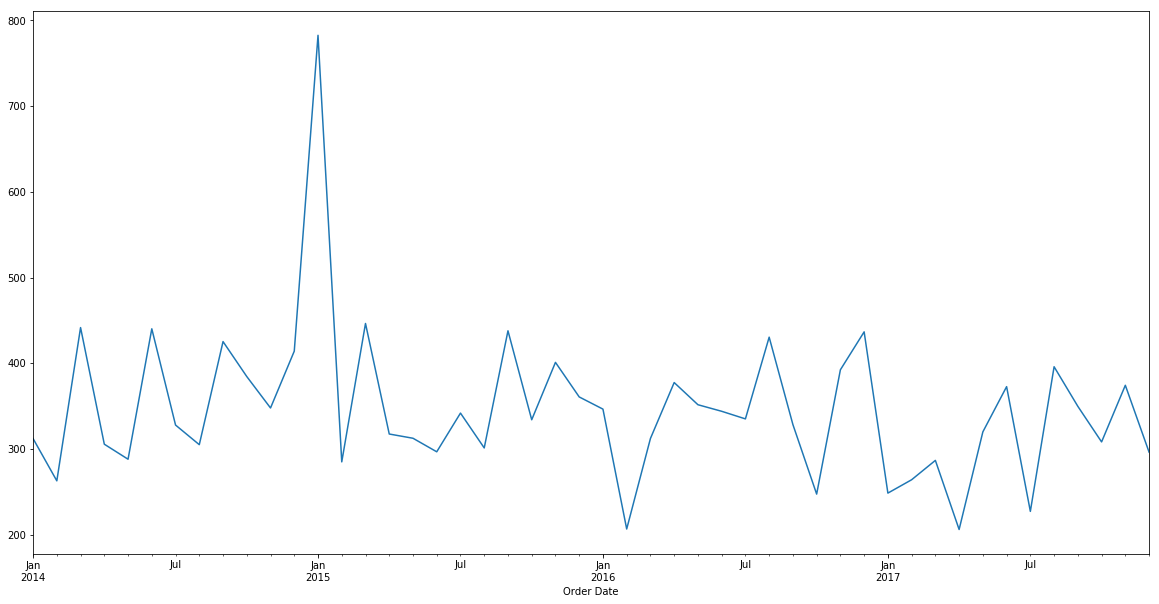

In [19]:
y.plot(figsize =(20,10))

In [25]:
import statsmodels as sm

In [26]:
statsmodels.__version__


'0.9.0'

In [28]:
import statsmodels.api as sm


ImportError: cannot import name 'factorial' from 'scipy.misc' (C:\Users\saket\Anaconda333\lib\site-packages\scipy\misc\__init__.py)

### Time Series Forecasting using ARIMA
* ARIMA - Auto Regreressive intigrated moving average 
* ARIMA is the most used and simple method in time series method 
* ARIMA consists of three things p(sesionality),d(trend),q(noice)

### Explanation 

In [29]:
p=d=q = range(0,2)

In [31]:
import itertools

In [32]:
pdq = list(itertools.product(p,d,q))

In [33]:
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 1, 0),
 (0, 1, 1),
 (1, 0, 0),
 (1, 0, 1),
 (1, 1, 0),
 (1, 1, 1)]

In [35]:
### Doing the prediction